<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(4)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_4'

In [4]:
os.listdir(base_path)

['data_multi_delta_4_n20.csv',
 'data_multi_delta_4_n30.csv',
 'data_multi_delta_4_n60.csv',
 'data_multi_delta_4_n120.csv',
 'data_multi_delta_4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,45.866658,75.921912,-2581.315422,-2449.526851,-1025.001756,-1424.525096
1,0.0,1.0,21.991031,29.751787,598.636292,660.379109,468.461017,191.918092
2,0.0,2.0,48.807217,29.775989,-660.029987,-571.446780,466.091209,-1037.537989
3,0.0,3.0,62.123383,81.115051,927.278804,1080.517238,-1193.787453,2274.304691
4,0.0,4.0,31.044014,91.679383,-8002.179575,-7869.456178,-1533.347850,-6336.108328
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,32.811920,52.262249,3784.636336,3879.710505,164.118831,3715.591674
119996,999.0,116.0,47.770402,37.919117,1505.270634,1600.960153,276.870535,1324.089618
119997,999.0,117.0,47.789142,88.839047,12840.677860,12987.306048,-790.608961,13777.915009
119998,999.0,118.0,20.240391,80.607304,-6064.142656,-5953.294961,-272.081552,-5681.213409


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,45.866658,75.921912,-2581.315422,-2449.526851,-1025.001756,-1424.525096
1,0.0,1.0,21.991031,29.751787,598.636292,660.379109,468.461017,191.918092
2,0.0,2.0,48.807217,29.775989,-660.029987,-571.446780,466.091209,-1037.537989
3,0.0,3.0,62.123383,81.115051,927.278804,1080.517238,-1193.787453,2274.304691
4,0.0,4.0,31.044014,91.679383,-8002.179575,-7869.456178,-1533.347850,-6336.108328
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,32.811920,52.262249,3784.636336,3879.710505,164.118831,3715.591674
119996,999.0,116.0,47.770402,37.919117,1505.270634,1600.960153,276.870535,1324.089618
119997,999.0,117.0,47.789142,88.839047,12840.677860,12987.306048,-790.608961,13777.915009
119998,999.0,118.0,20.240391,80.607304,-6064.142656,-5953.294961,-272.081552,-5681.213409


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    45.866658  75.921912  -2581.315422  -2449.526851 -1025.001756   
      1.0    21.991031  29.751787    598.636292    660.379109   468.461017   
      2.0    48.807217  29.775989   -660.029987   -571.446780   466.091209   
      3.0    62.123383  81.115051    927.278804   1080.517238 -1193.787453   
      4.0    31.044014  91.679383  -8002.179575  -7869.456178 -1533.347850   
...                ...        ...           ...           ...          ...   
999.0 115.0  32.811920  52.262249   3784.636336   3879.710505   164.118831   
      116.0  47.770402  37.919117   1505.270634   1600.960153   276.870535   
      117.0  47.789142  88.839047  12840.677860  12987.306048  -790.608961   
      118.0  20.240391  80.607304  -6064.142656  -5953.294961  -272.081552   
      119.0  55.419465  93.798859   4322.611117   4481.829440  -990.395343   

                    e_hat  
rep   index                
0.0   0.0    -1424.525096  
      1.0      191.918092  
      2.0    -1037.537989  
      3.0     2274.304691  
      4.0    -6336.108328  
...                   ...  
999.0 115.0   3715.591674  
      116.0   1324.089618  
      117.0  13777.915009  
      118.0  -5681.213409  
      119.0   5472.224783  

[120000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    45.866658  75.921912  -2581.315422  -2449.526851 -1025.001756   
      1.0    21.991031  29.751787    598.636292    660.379109   468.461017   
      2.0    48.807217  29.775989   -660.029987   -571.446780   466.091209   
      3.0    62.123383  81.115051    927.278804   1080.517238 -1193.787453   
      4.0    31.044014  91.679383  -8002.179575  -7869.456178 -1533.347850   
...                ...        ...           ...           ...          ...   
999.0 115.0  32.811920  52.262249   3784.636336   3879.710505   164.118831   
      116.0  47.770402  37.919117   1505.270634   1600.960153   276.870535   
      117.0  47.789142  88.839047  12840.677860  12987.306048  -790.608961   
      118.0  20.240391  80.607304  -6064.142656  -5953.294961  -272.081552   
      119.0  55.419465  93.798859   4322.611117   4481.829440  -990.395343   

                    e_hat  
rep   index                
0.0   0.0    -1424.525096  
      1.0      191.918092  
      2.0    -1037.537989  
      3.0     2274.304691  
      4.0    -6336.108328  
...                   ...  
999.0 115.0   3715.591674  
      116.0   1324.089618  
      117.0  13777.915009  
      118.0  -5681.213409  
      119.0   5472.224783  

[120000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,45.866658,75.921912,-2581.315422,-2449.526851,-1025.001756,-1424.525096
1,0.0,1.0,21.991031,29.751787,598.636292,660.379109,468.461017,191.918092
2,0.0,2.0,48.807217,29.775989,-660.029987,-571.446780,466.091209,-1037.537989
3,0.0,3.0,62.123383,81.115051,927.278804,1080.517238,-1193.787453,2274.304691
4,0.0,4.0,31.044014,91.679383,-8002.179575,-7869.456178,-1533.347850,-6336.108328
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,32.811920,52.262249,3784.636336,3879.710505,164.118831,3715.591674
119996,999.0,116.0,47.770402,37.919117,1505.270634,1600.960153,276.870535,1324.089618
119997,999.0,117.0,47.789142,88.839047,12840.677860,12987.306048,-790.608961,13777.915009
119998,999.0,118.0,20.240391,80.607304,-6064.142656,-5953.294961,-272.081552,-5681.213409


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2             e             Y        y_hat  \
rep   index                                                                  
0.0   0.0    45.866658  75.921912  -2581.315422  -2449.526851 -1025.001756   
      1.0    21.991031  29.751787    598.636292    660.379109   468.461017   
      2.0    48.807217  29.775989   -660.029987   -571.446780   466.091209   
      3.0    62.123383  81.115051    927.278804   1080.517238 -1193.787453   
      4.0    31.044014  91.679383  -8002.179575  -7869.456178 -1533.347850   
...                ...        ...           ...           ...          ...   
999.0 115.0  32.811920  52.262249   3784.636336   3879.710505   164.118831   
      116.0  47.770402  37.919117   1505.270634   1600.960153   276.870535   
      117.0  47.789142  88.839047  12840.677860  12987.306048  -790.608961   
      118.0  20.240391  80.607304  -6064.142656  -5953.294961  -272.081552   
      119.0  55.419465  93.798859   4322.611117   4481.829440  -990.395343   

                    e_hat  
rep   index                
0.0   0.0    -1424.525096  
      1.0      191.918092  
      2.0    -1037.537989  
      3.0     2274.304691  
      4.0    -6336.108328  
...                   ...  
999.0 115.0   3715.591674  
      116.0   1324.089618  
      117.0  13777.915009  
      118.0  -5681.213409  
      119.0   5472.224783  

[120000 rows x 6 columns]

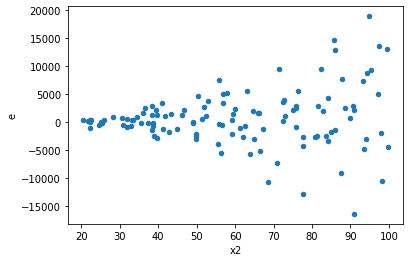

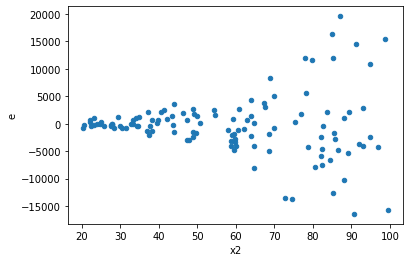

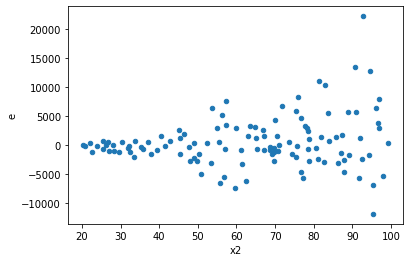

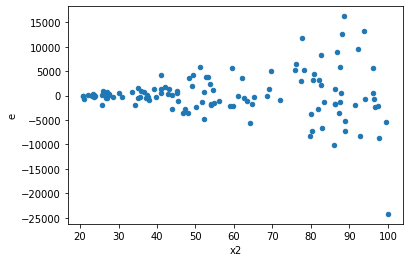

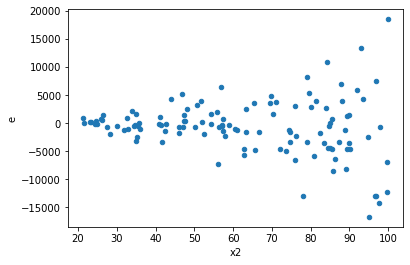

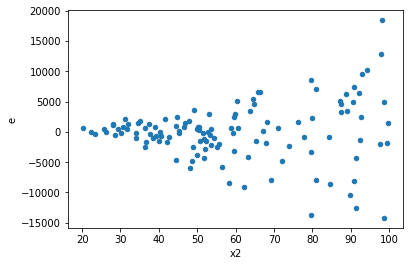

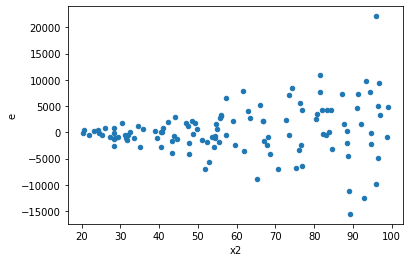

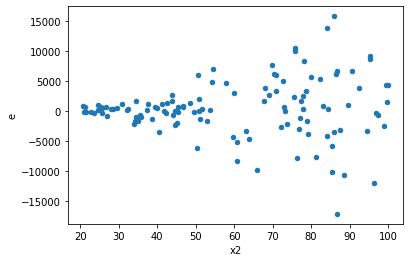

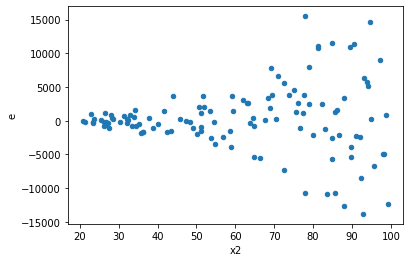

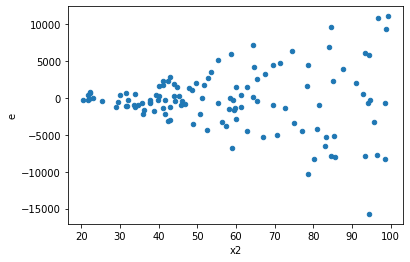

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,46.0,46.0,65591641.23488543,2243772162.0549088,1425905.24423664,48777655.696845844,34.20820274979704,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
1.0,46.0,46.0,84898817.87134829,2021572205.8977904,1845626.4754640933,43947221.86734327,23.811547163839037,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
2.0,46.0,46.0,78992412.10693292,2172190336.888314,1717226.3501507158,47221529.06278943,27.498721446153525,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
3.0,46.0,46.0,100213211.08774176,2039876730.137804,2178548.067124821,44345146.307343565,20.355367401128262,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
4.0,46.0,46.0,81994111.55371633,2547444983.6554484,1782480.6859503551,55379238.77511845,31.068633288215526,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
5.0,46.0,46.0,142926163.4222585,2931817096.82233,3107090.5091795325,63735154.27874631,20.5128090380529,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
6.0,46.0,46.0,135289012.7115973,1386703253.870017,2941065.493730376,30145722.910217762,10.249932541278318,7.762679388179095e-13,0.9999999999996119,3.8813396940895473e-13,Reject005=0 : Heteroscedasticity
7.0,46.0,46.0,82233374.91543387,1640861452.9706993,1787682.0633789971,35670901.15153694,19.953716537331808,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
8.0,46.0,46.0,89359675.00250065,2611982767.8240576,1942601.6304891447,56782234.083131686,29.22999404094703,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,46.0,46.0,65591641.23488543,2243772162.0549088,1425905.24423664,48777655.696845844,34.20820274979704,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
1.0,46.0,46.0,84898817.87134829,2021572205.8977904,1845626.4754640933,43947221.86734327,23.811547163839037,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
2.0,46.0,46.0,78992412.10693292,2172190336.888314,1717226.3501507158,47221529.06278943,27.498721446153525,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
3.0,46.0,46.0,100213211.08774176,2039876730.137804,2178548.067124821,44345146.307343565,20.355367401128262,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,46.0,46.0,81994111.55371633,2547444983.6554484,1782480.6859503551,55379238.77511845,31.068633288215526,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
5.0,46.0,46.0,142926163.4222585,2931817096.82233,3107090.5091795325,63735154.27874631,20.5128090380529,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
6.0,46.0,46.0,135289012.7115973,1386703253.870017,2941065.493730376,30145722.910217762,10.249932541278318,7.762679388179095e-13,Reject005=0 : Heteroscedasticity
7.0,46.0,46.0,82233374.91543387,1640861452.9706993,1787682.0633789971,35670901.15153694,19.953716537331808,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
8.0,46.0,46.0,89359675.00250065,2611982767.8240576,1942601.6304891447,56782234.083131686,29.22999404094703,2.220446049250313e-16,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64